<a href="https://colab.research.google.com/github/LorenaAmaya/Proyecto-COINFLUX-ANALYTICS/blob/main/prototipo_proyecto_criptomonedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prototipo Proyecto criptomonedas

#Intento 1


In [ ]:
import requests
import sqlite3

# Conectarse a la base de datos SQLite
conn = sqlite3.connect('criptomonedas.db')
cursor = conn.cursor()

# Crear la tabla para almacenar los datos de criptomonedas
cursor.execute('''
    CREATE TABLE IF NOT EXISTS criptomonedas (
        id INTEGER PRIMARY KEY,
        nombre TEXT,
        simbolo TEXT,
        precio FLOAT,
        capitalizacion FLOAT,
        volumen FLOAT,
        cambio_porcentaje FLOAT
    )
''')
conn.commit()

# Obtener datos de CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {
    'vs_currency': 'usd',  # Seleccionar la moneda de referencia
    'per_page': 100,  # Número de resultados por página
    'page': 1  # Página de resultados
}
response = requests.get(url, params=params)
data = response.json()

# Insertar los datos en la tabla de la base de datos
for crypto in data:
    cursor.execute('''
        INSERT INTO criptomonedas (nombre, simbolo, precio, capitalizacion, volumen, cambio_porcentaje)
        VALUES (?, ?, ?, ?, ?, ?)
    ''', (crypto['name'], crypto['symbol'], crypto['current_price'], crypto['market_cap'], crypto['total_volume'], crypto['price_change_percentage_24h']))
conn.commit()

# Cerrar la conexión con la base de datos
conn.close()

print("Datos de criptomonedas almacenados en la base de datos.")


Datos de criptomonedas almacenados en la base de datos.


   id    nombre simbolo     precio  capitalizacion       volumen  \
0   1   Bitcoin     btc  66826.000    1.317425e+12  2.761304e+10   
1   2  Ethereum     eth   3205.680    3.851852e+11  1.214291e+10   
2   3    Tether    usdt      1.001    1.099132e+11  4.271743e+10   
3   4       BNB     bnb    606.430    9.340986e+10  1.630766e+09   
4   5    Solana     sol    157.700    7.030966e+10  3.487725e+09   

   cambio_porcentaje  
0            2.63357  
1            1.32307  
2           -0.00352  
3            4.05969  
4            5.08974  


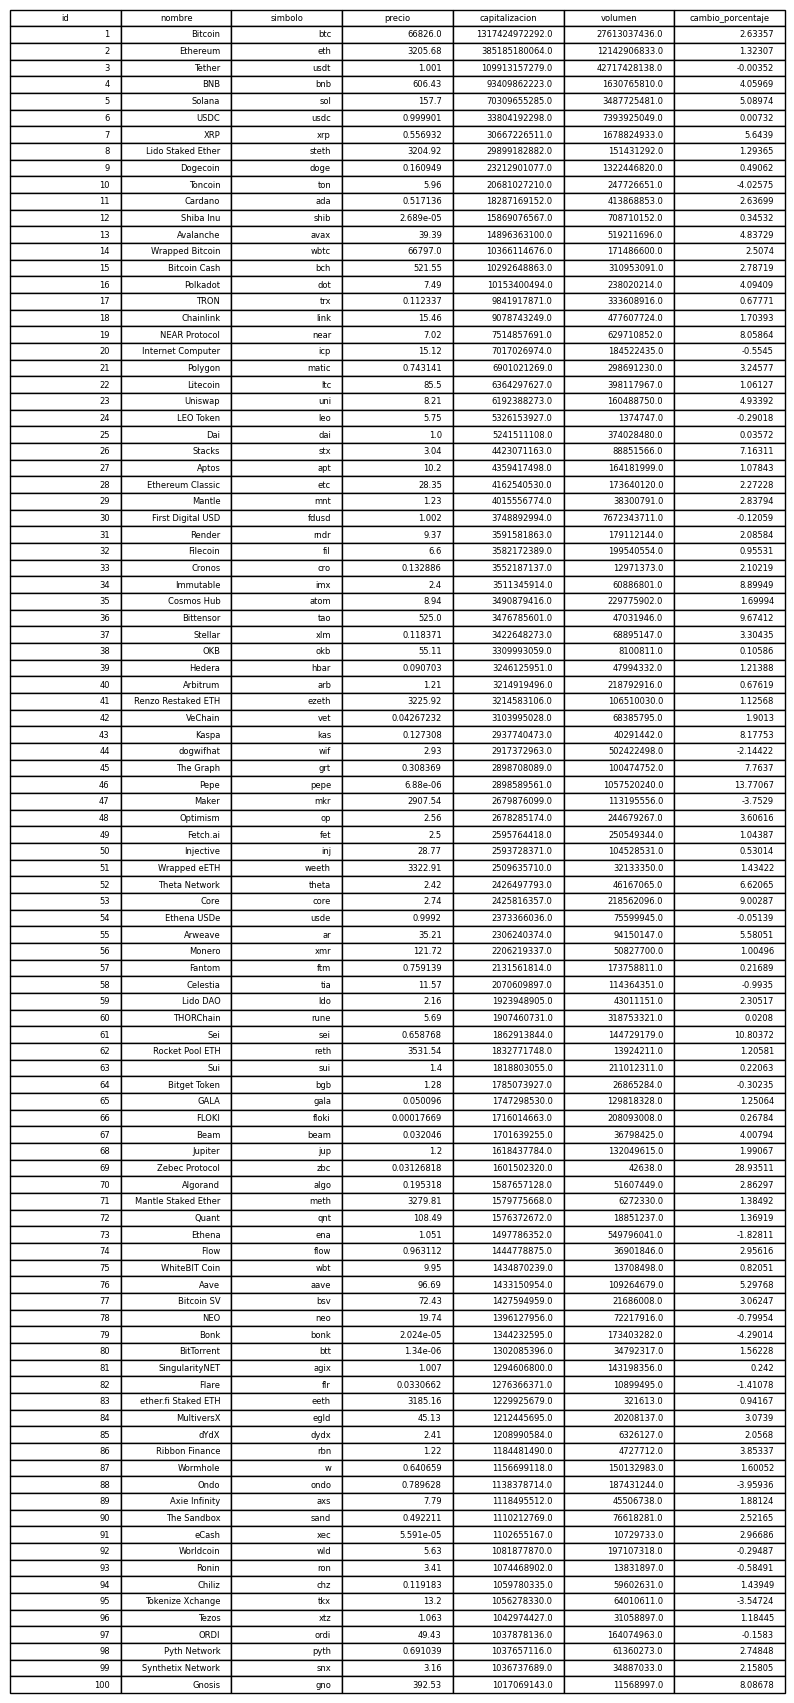

In [ ]:
#tabla
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite
conn = sqlite3.connect('criptomonedas.db')

# Leer los datos de la tabla criptomonedas en un DataFrame de pandas
df = pd.read_sql_query("SELECT * FROM criptomonedas", conn)

# Cerrar la conexión con la base de datos
conn.close()

# Mostrar las primeras filas del DataFrame para verificar que los datos se han leído correctamente
print(df.head())

# Visualizar los datos en una tabla
plt.figure(figsize=(10, 6))
plt.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.axis('off')
plt.show()



#Intento 2

Se descargó el archivo desde la api de coingeko es la comparativa de esas monedas frente el usd (dolar americano) https://www.coingecko.com/api/documentation

In [ ]:
# Importar el almacenamiento drive para trabajar sobre un documento
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/proyecto/response_1712712710911.json'
file = 'response_1712712710911.json'

In [ ]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_json(path)

In [ ]:
#df.head(5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                100 non-null    object 
 1   symbol                            100 non-null    object 
 2   name                              100 non-null    object 
 3   image                             100 non-null    object 
 4   current_price                     100 non-null    float64
 5   market_cap                        100 non-null    int64  
 6   market_cap_rank                   100 non-null    int64  
 7   fully_diluted_valuation           98 non-null     float64
 8   total_volume                      100 non-null    int64  
 9   high_24h                          100 non-null    float64
 10  low_24h                           100 non-null    float64
 11  price_change_24h                  100 non-null    float64
 12  price_cha

In [ ]:
df.shape

(100, 26)

In [ ]:
df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

Seleccionamos 5 monedas a las cuales se les hará todo el análisis, en este caso seleccionamos:
- Bitcoin, Ethereum, Tether, Binancecoin y Solana

In [ ]:
criptomonedas_interes = ['bitcoin', 'ethereum', 'tether', 'binancecoin', 'solana']

# Filtrar el DataFrame para que contenga solo las filas de las cinco criptomonedas
criptodf = df.loc[df['id'].isin(criptomonedas_interes)]

# Ahora criptomonedas_df contiene solo las filas correspondientes a las cinco criptomonedas
criptodf.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,68863.000000,1353276968370,1,1.444168e+12,36051570288,71590.000,...,2.100000e+07,21000000.0,73738.00,-6.87777,2024-03-14T07:10:36.635Z,67.810000,1.011645e+05,2013-07-06T00:00:00.000Z,None,2024-04-10T01:31:38.622Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,3492.600000,418532255671,2,4.185323e+11,18500644864,3721.000,...,1.200705e+08,NaN,4878.26,-28.56049,2021-11-10T14:24:19.604Z,0.432979,8.047904e+05,2015-10-20T00:00:00.000Z,"{'times': 66.83159773867932, 'currency': 'btc'...",2024-04-10T01:31:39.981Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999604,107114666691,3,1.071147e+11,62779912896,1.002,...,1.071893e+11,NaN,1.32,-24.47228,2018-07-24T00:00:00.000Z,0.572521,7.454446e+01,2015-03-02T00:00:00.000Z,None,2024-04-10T01:30:31.350Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,579.220000,88931272194,4,8.893127e+10,1703736887,585.630,...,1.538562e+08,200000000.0,686.31,-15.63531,2021-05-10T07:24:17.097Z,0.039818,1.454028e+06,2017-10-19T00:00:00.000Z,None,2024-04-10T01:31:38.040Z
4,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,171.210000,76079294794,5,9.792386e+10,3082588186,180.100,...,5.736594e+08,NaN,259.96,-34.22758,2021-11-06T21:54:35.825Z,0.500801,3.404159e+04,2020-05-11T19:35:23.449Z,None,2024-04-10T01:31:37.796Z


In [ ]:
criptodf.shape

(5, 26)

In [ ]:
#Eliminamos columnas que no son necesarias para el analisis
criptodf = criptodf.drop(columns=['image'])

In [ ]:
criptodf = criptodf.drop(columns=['total_volume', 'high_24h', 'low_24h','price_change_24h'])

In [ ]:
criptodf = criptodf.drop(columns=['price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'roi'])

In [ ]:
#Vemos el tamaño de nuestro DataFrame con las columnas necesarias
criptodf.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,68863.000000,1353276968370,1,1.444168e+12,73738.00,-6.87777,2024-03-14T07:10:36.635Z,67.810000,1.011645e+05,2013-07-06T00:00:00.000Z,2024-04-10T01:31:38.622Z
1,ethereum,eth,Ethereum,3492.600000,418532255671,2,4.185323e+11,4878.26,-28.56049,2021-11-10T14:24:19.604Z,0.432979,8.047904e+05,2015-10-20T00:00:00.000Z,2024-04-10T01:31:39.981Z
2,tether,usdt,Tether,0.999604,107114666691,3,1.071147e+11,1.32,-24.47228,2018-07-24T00:00:00.000Z,0.572521,7.454446e+01,2015-03-02T00:00:00.000Z,2024-04-10T01:30:31.350Z
3,binancecoin,bnb,BNB,579.220000,88931272194,4,8.893127e+10,686.31,-15.63531,2021-05-10T07:24:17.097Z,0.039818,1.454028e+06,2017-10-19T00:00:00.000Z,2024-04-10T01:31:38.040Z
4,solana,sol,Solana,171.210000,76079294794,5,9.792386e+10,259.96,-34.22758,2021-11-06T21:54:35.825Z,0.500801,3.404159e+04,2020-05-11T19:35:23.449Z,2024-04-10T01:31:37.796Z


In [ ]:
criptodf.shape

(5, 14)

In [ ]:
#Cambiamos el nombre de las columnas para un mejor entendimiento
criptodf_n=criptodf.rename (columns={'symbol': 'Simbolo', 'name': 'Nombre',
                                     'current_price': 'Precio_Actual',
                                     'market_cap': 'Mercado',
                                     'market_cap_rank': 'Top_Mercado',
                                     'fully_diluted_valuation': 'Valor_Neto',
                                     'ath_change_percentage': 'ATH_Porcentaje_cambio',
                                     'ath_date': 'ATH_Fecha',
                                     'atl_change_percentage': 'ATL_Porcentaje_cambio',
                                     'atl_date': 'ATL_Fecha'})
print(criptodf_n)

            id Simbolo    Nombre  Precio_Actual        Mercado  Top_Mercado  \
0      bitcoin     btc   Bitcoin   68863.000000  1353276968370            1   
1     ethereum     eth  Ethereum    3492.600000   418532255671            2   
2       tether    usdt    Tether       0.999604   107114666691            3   
3  binancecoin     bnb       BNB     579.220000    88931272194            4   
4       solana     sol    Solana     171.210000    76079294794            5   

     Valor_Neto       ath  ATH_Porcentaje_cambio                 ATH_Fecha  \
0  1.444168e+12  73738.00               -6.87777  2024-03-14T07:10:36.635Z   
1  4.185323e+11   4878.26              -28.56049  2021-11-10T14:24:19.604Z   
2  1.071147e+11      1.32              -24.47228  2018-07-24T00:00:00.000Z   
3  8.893127e+10    686.31              -15.63531  2021-05-10T07:24:17.097Z   
4  9.792386e+10    259.96              -34.22758  2021-11-06T21:54:35.825Z   

         atl  ATL_Porcentaje_cambio                 ATL_

In [ ]:
criptodf_n.head()

,id,Simbolo,Nombre,Precio_Actual,Mercado,Top_Mercado,Valor_Neto,ath,ATH_Porcentaje_cambio,ATH_Fecha,atl,ATL_Porcentaje_cambio,ATL_Fecha,last_updated
0,bitcoin,btc,Bitcoin,68863.000000,1353276968370,1,1.444168e+12,73738.00,-6.87777,2024-03-14T07:10:36.635Z,67.810000,1.011645e+05,2013-07-06T00:00:00.000Z,2024-04-10T01:31:38.622Z
1,ethereum,eth,Ethereum,3492.600000,418532255671,2,4.185323e+11,4878.26,-28.56049,2021-11-10T14:24:19.604Z,0.432979,8.047904e+05,2015-10-20T00:00:00.000Z,2024-04-10T01:31:39.981Z
2,tether,usdt,Tether,0.999604,107114666691,3,1.071147e+11,1.32,-24.47228,2018-07-24T00:00:00.000Z,0.572521,7.454446e+01,2015-03-02T00:00:00.000Z,2024-04-10T01:30:31.350Z
3,binancecoin,bnb,BNB,579.220000,88931272194,4,8.893127e+10,686.31,-15.63531,2021-05-10T07:24:17.097Z,0.039818,1.454028e+06,2017-10-19T00:00:00.000Z,2024-04-10T01:31:38.040Z
4,solana,sol,Solana,171.210000,76079294794,5,9.792386e+10,259.96,-34.22758,2021-11-06T21:54:35.825Z,0.500801,3.404159e+04,2020-05-11T19:35:23.449Z,2024-04-10T01:31:37.796Z


In [ ]:
criptodf_n.to_csv('crypto_clean.csv', index=False)


In [ ]:
from google.colab import files

files.download('crypto_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Preguntas para análisis

Importamos la librería SQLite para poder trabajar con los datos y responder las preguntas de manera más sencilla

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/crypto_clean.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conn = sqlite3.connect('criptodfclean.db')
tbl = 'cryptodf'
df = pd.read_csv(path)
df.to_sql(tbl, conn, if_exists='replace', index=False)

5

In [ ]:
tables = pd.read_sql("""SELECT *
                        FROM cryptodf;""", conn)
tables

,id,Simbolo,Nombre,Precio_Actual,Mercado,Top_Mercado,Valor_Neto,ath,ATH_Porcentaje_cambio,ATH_Fecha,atl,ATL_Porcentaje_cambio,ATL_Fecha,last_updated
0,bitcoin,btc,Bitcoin,68863.000000,1353276968370,1,1.444168e+12,73738.00,-6.87777,2024-03-14T07:10:36.635Z,67.810000,1.011645e+05,2013-07-06T00:00:00.000Z,2024-04-10T01:31:38.622Z
1,ethereum,eth,Ethereum,3492.600000,418532255671,2,4.185323e+11,4878.26,-28.56049,2021-11-10T14:24:19.604Z,0.432979,8.047904e+05,2015-10-20T00:00:00.000Z,2024-04-10T01:31:39.981Z
2,tether,usdt,Tether,0.999604,107114666691,3,1.071147e+11,1.32,-24.47228,2018-07-24T00:00:00.000Z,0.572521,7.454446e+01,2015-03-02T00:00:00.000Z,2024-04-10T01:30:31.350Z
3,binancecoin,bnb,BNB,579.220000,88931272194,4,8.893127e+10,686.31,-15.63531,2021-05-10T07:24:17.097Z,0.039818,1.454028e+06,2017-10-19T00:00:00.000Z,2024-04-10T01:31:38.040Z
4,solana,sol,Solana,171.210000,76079294794,5,9.792386e+10,259.96,-34.22758,2021-11-06T21:54:35.825Z,0.500801,3.404159e+04,2020-05-11T19:35:23.449Z,2024-04-10T01:31:37.796Z


In [ ]:
#Cual es la moneda mas cotizada segun su maximo historico?
query = '''SELECT id, Simbolo, Nombre, ath
           FROM cryptodf
           ORDER BY ath DESC;'''
max_historico= pd.read_sql(query, conn)
max_historico


,id,Simbolo,Nombre,ath
0,bitcoin,btc,Bitcoin,73738.00
1,ethereum,eth,Ethereum,4878.26
2,binancecoin,bnb,BNB,686.31
3,solana,sol,Solana,259.96
4,tether,usdt,Tether,1.32


In [ ]:
#¿cual es la fecha del maximo historico de cada una de las monedas utilizadas para el analisis?
query = '''SELECT Nombre, ath, Ath_Fecha
           FROM cryptodf
           ORDER BY ath DESC;'''
fecha_max = pd.read_sql(query, conn)
fecha_max

,Nombre,ath,ATH_Fecha
0,Bitcoin,73738.00,2024-03-14T07:10:36.635Z
1,Ethereum,4878.26,2021-11-10T14:24:19.604Z
2,BNB,686.31,2021-05-10T07:24:17.097Z
3,Solana,259.96,2021-11-06T21:54:35.825Z
4,Tether,1.32,2018-07-24T00:00:00.000Z


In [ ]:
#¿cual es el porcentaje de cambio mas bajo de ath?
query = '''SELECT Nombre, ATH_Porcentaje_cambio
           FROM cryptodf
           ORDER BY ATH_Porcentaje_cambio ASC
           LIMIT 1;'''
porcentaje_cambio= pd.read_sql(query, conn)
porcentaje_cambio

,Nombre,ATH_Porcentaje_cambio
0,Solana,-34.22758


In [ ]:
#¿cual es el porcentaje de cambio mas alto de ath?
query = '''SELECT Nombre, ATH_Porcentaje_cambio
           FROM cryptodf
           ORDER BY ATH_Porcentaje_cambio DESC
           LIMIT 1;'''
porcentaje_min_cambio= pd.read_sql(query, conn)
porcentaje_min_cambio

,Nombre,ATH_Porcentaje_cambio
0,Bitcoin,-6.87777


In [ ]:
#¿Cual es la moneda con el atl mas bajo y su porcentaje?
query = '''SELECT id, Nombre, atl, ATL_Porcentaje_cambio
           FROM cryptodf
           ORDER BY atl ASC
           LIMIT 1;'''
atl_mas_bajo = pd.read_sql(query, conn)
atl_mas_bajo

,id,Nombre,atl,ATL_Porcentaje_cambio
0,binancecoin,BNB,0.039818,1.454028e+06


In [ ]:
#¿cual es la fecha de esa caida en su valor?
query = '''SELECT id, Nombre, atl, ATL_Porcentaje_cambio, ATL_Fecha
           FROM cryptodf
           ORDER BY atl ASC
           LIMIT 1;'''
fecha_atl = pd.read_sql(query, conn)
fecha_atl

,id,Nombre,atl,ATL_Porcentaje_cambio,ATL_Fecha
0,binancecoin,BNB,0.039818,1.454028e+06,2017-10-19T00:00:00.000Z


In [ ]:
#Promedio por moneda entre el atl y el ath
query = ''' SELECT id, Nombre,
            ROUND(AVG(atl + ath), 2) AS promedio_estandar
            FROM cryptodf
            WHERE Nombre = 'Bitcoin';'''
promedio_bitcoin = pd.read_sql(query, conn)
promedio_bitcoin

,id,Nombre,promedio_estandar
0,bitcoin,Bitcoin,73805.81


In [ ]:
#Promedio por moneda entre el atl y el ath
query = ''' SELECT id, Nombre,
            ROUND(AVG(atl + ath), 2) AS promedio_estandar
            FROM cryptodf
            WHERE Nombre = 'Ethereum';'''
promedio_ethereum = pd.read_sql(query, conn)
promedio_ethereum

,id,Nombre,promedio_estandar
0,ethereum,Ethereum,4878.69


In [ ]:
#Promedio por moneda entre el atl y el ath
query = ''' SELECT id, Nombre,
            ROUND(AVG(atl + ath), 2) AS promedio_estandar
            FROM cryptodf
            WHERE Nombre = 'Tether';'''
promedio_tether = pd.read_sql(query, conn)
promedio_tether

,id,Nombre,promedio_estandar
0,tether,Tether,1.89


In [ ]:
#Promedio por moneda entre el atl y el ath
query = ''' SELECT id, Nombre,
            ROUND(AVG(atl + ath), 2) AS promedio_estandar
            FROM cryptodf
            WHERE Nombre = 'BNB';'''
promedio_bnb = pd.read_sql(query, conn)
promedio_bnb

,id,Nombre,promedio_estandar
0,binancecoin,BNB,686.35


In [ ]:
#Promedio por moneda entre el atl y el ath
query = ''' SELECT id, Nombre,
            ROUND(AVG(atl + ath), 2) AS promedio_estandar
            FROM cryptodf
            WHERE Nombre = 'Solana';'''
promedio_solana = pd.read_sql(query, conn)
promedio_solana

,id,Nombre,promedio_estandar
0,solana,Solana,260.46
